# **Topic 4:** Linear Regression
# **Course Code:** CSEL302 | Introduction to Intelligent Systems
# **Student Name:** Mhar Andrei C. Macapallag
# **Due Date: **March 5, 2024
# **Week No. 5**

In [ ]:
#@title Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Preview of the Dataset:
   Hours_of_Study  Attendance_Percentage  Previous_Exam_Scores  \
0        4.370861              75.553988             63.085284   
1        9.556429              86.257028             62.348940   
2        7.587945              96.188375             95.312729   
3        6.387926              91.966747             62.477310   
4        2.404168              94.196834             63.597486   

   Extracurricular_Activities  Travel_Time_to_School     Grades  
0                           0              24.325977  31.494329  
1                           0              50.132016  43.250150  
2                           0              59.861895  30.155663  
3                           1              11.501300  39.617522  
4                           0              54.868293  33.175874  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  

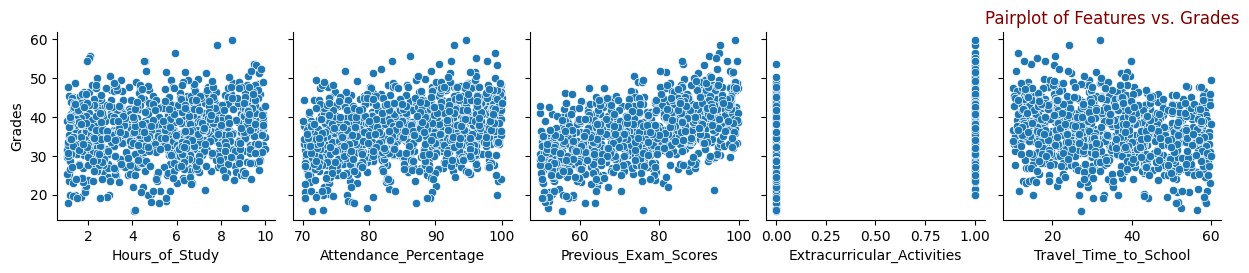

In [ ]:
#@title 1. Data Exploration
#@markdown - The Impact based on the descriptive statistics of Attendance_Percentages is the highest among the five features, followed by the Previous_Exam_Scores, then Travel_Time_To_School, then Hours_of_Study, and finally, Extra_Curricular_Activities.

# Specify the dataset file path or URL
dataset_path = "Lesson_4_student_grades_dataset 2.csv" #@param {type:"string"}

# Load the dataset
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Preview of the Dataset:")
print(df.head())

# Display information about the dataset
print("\nDataset Information:")
print(df.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Visualize relationships between features and the target variable
sns.pairplot(df, x_vars=["Hours_of_Study", "Attendance_Percentage", "Previous_Exam_Scores",
                         "Extracurricular_Activities", "Travel_Time_to_School"], y_vars="Grades")
plt.title('Pairplot of Features vs. Grades', color='maroon')
plt.show()

In [ ]:
#@title 2. Data Preprocessing
#@markdown - The importance of normalizing or standarizing numerical features is crucial for increasing the accuracy of the data.

# Handle missing data if necessary
df.dropna(inplace=True)

# Display the count of missing values in each column
print("Missing Values After Dropping:")
print(df.isnull().sum())

Missing Values After Dropping:
Hours_of_Study                0
Attendance_Percentage         0
Previous_Exam_Scores          0
Extracurricular_Activities    0
Travel_Time_to_School         0
Grades                        0
dtype: int64


In [ ]:
#@title 3. Train-Test Split
#@markdown - Seperating features or independent variables (X) and target variable or dependent variable (y) then splitting the datasets into training and testing sets of 80%:20%.
# Separate features (X) and target variable (y)
X = df.drop("Grades", axis=1)
y = df["Grades"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of X during training: (1000, 5)
Shape of input for Hours_of_Study during prediction: (1, 5)
Predicted Y for New X (Hours_of_Study): 831.9798892225919
Shape of input for Attendance_Percentage during prediction: (1, 5)
Predicted Y for New X (Attendance_Percentage): 712.4494183959825
Shape of input for Previous_Exam_Scores during prediction: (1, 5)
Predicted Y for New X (Previous_Exam_Scores): 643.4563647537952
Shape of input for Extracurricular_Activities during prediction: (1, 5)
Predicted Y for New X (Extracurricular_Activities): 632.8101558872277
Shape of input for Travel_Time_to_School during prediction: (1, 5)
Predicted Y for New X (Travel_Time_to_School): 951.975361837494
Shape of overall input during prediction: (1, 5)

Overall Predicted Y for New X: 887.7225651155006


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

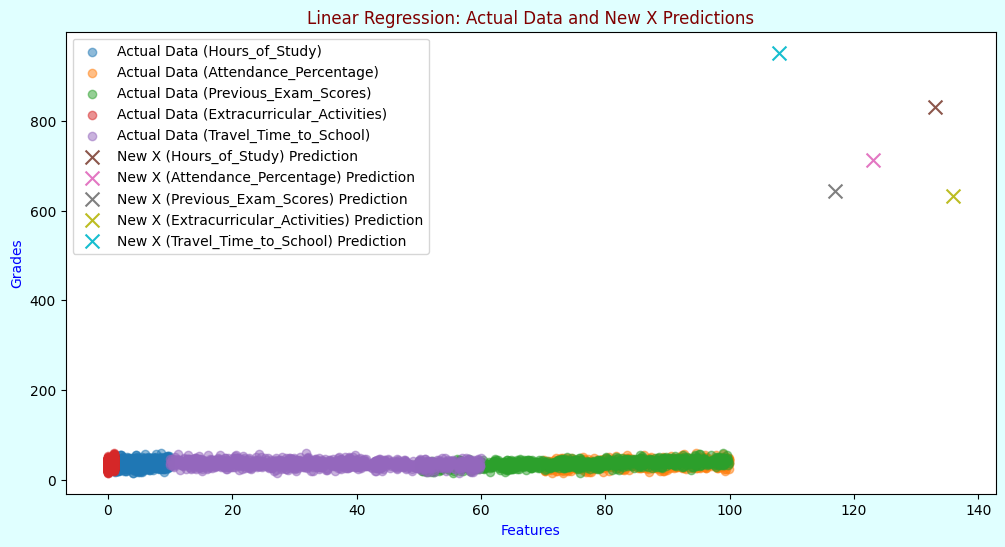

Coefficients: [ 0.31171319  0.21354489  0.24596857  4.86371727 -0.0918586 ]
Intercept: -1.4103073617217277


In [ ]:
#@title 4. Linear Regression Model
#@markdown - The coefficients [ 0.31171319  0.21354489  0.24596857  4.86371727 -0.0918586 ] are the values that determines the potential impact on student grades.
# 4. Linear Regression Model, Predictions, and Visualization
from sklearn.linear_model import LinearRegression

# Specify the features and target variable
X = df[['Hours_of_Study', 'Attendance_Percentage', 'Previous_Exam_Scores',
        'Extracurricular_Activities', 'Travel_Time_to_School']]
y = df['Grades']

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Ensure 'new_x_individual' has the correct features
new_x_individual = {feature: [[np.random.randint(100, 200) for _ in range(len(X.columns))]] for feature in X.columns}

# Check the shape of X during training
print("Shape of X during training:", X.shape)

# Predictions for each feature individually
predicted_y_individual = {}
for feature, value in new_x_individual.items():
    reshaped_input = np.array(value).reshape(1, -1)
    print(f"Shape of input for {feature} during prediction:", reshaped_input.shape)

    # Ensure the number of features matches
    assert reshaped_input.shape[1] == X.shape[1], f"Number of features mismatch for {feature}"

    predicted_y_individual[feature] = model.predict(reshaped_input)[0]
    print(f"Predicted Y for New X ({feature}): {predicted_y_individual[feature]}")

# Generate new random values for all features
new_x_overall = [[np.random.randint(100, 200) for _ in range(len(X.columns))]]

# Overall prediction
reshaped_overall_input = np.array(new_x_overall).reshape(1, -1)
print("Shape of overall input during prediction:", reshaped_overall_input.shape)

# Ensure the number of features matches
assert reshaped_overall_input.shape[1] == X.shape[1], "Number of features mismatch for overall prediction"

predicted_y_overall = model.predict(reshaped_overall_input)[0]
print("\nOverall Predicted Y for New X:", predicted_y_overall)

# Visualizations (remain unchanged)
plt.figure(figsize=(12, 6), facecolor='lightcyan')

# Scatter plot for actual data
for feature in X.columns:
    plt.scatter(X[feature], y, label=f'Actual Data ({feature})', alpha=0.5)

# Scatter plot for predictions
for feature, value in new_x_individual.items():
    plt.scatter(value[0][0], predicted_y_individual[feature], label=f'New X ({feature}) Prediction', marker='x', s=100)

plt.xlabel('Features', color='blue')
plt.ylabel('Grades', color='blue')
plt.title('Linear Regression: Actual Data and New X Predictions', color='maroon')
plt.legend()
plt.show()

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

In [ ]:
#@title 5. Model Training
#@markdown - Fitting the linear regression model to the training data. As well as showing the Coefficients and Intercept.
model.fit(X_train, y_train)

# Retrieve and print model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.33491143  0.20253934  0.25216937  4.87399857 -0.09033945]
Intercept: -1.1380582971891897


Mean Squared Error (MSE): 21.85
Root Mean Squared Error (RMSE): 4.67
Mean Absolute Error (MAE): 3.75
R-squared (R2): 0.52


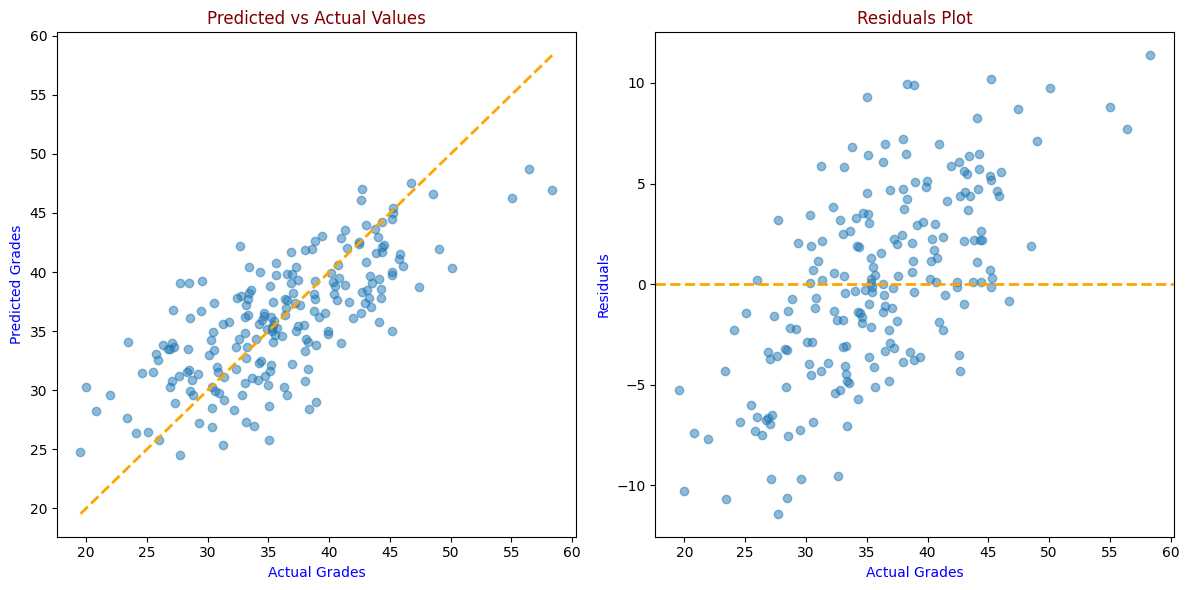

In [ ]:
#@title 6. Predictions and Evaluation
#@markdown - Calculating evaluation metrics such as mean absolute error and r squared score, and visualizing predictions vs actual values and residuals.
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize predictions vs actual values and residuals
plt.figure(figsize=(12, 6))

# Subplot 1: Predicted vs Actual Values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', linewidth=2)
plt.title('Predicted vs Actual Values', color='maroon')
plt.xlabel('Actual Grades', color='blue')
plt.ylabel('Predicted Grades', color='blue')

# Subplot 2: Residuals Plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='orange', linestyle='--', linewidth=2)
plt.title('Residuals Plot', color='maroon')
plt.xlabel('Actual Grades', color='blue')
plt.ylabel('Residuals', color='blue')

plt.tight_layout()
plt.show()

Coefficients: [ 0.31171319  0.21354489  0.24596857  4.86371727 -0.0918586 ]
Intercept: -1.4103073617217277


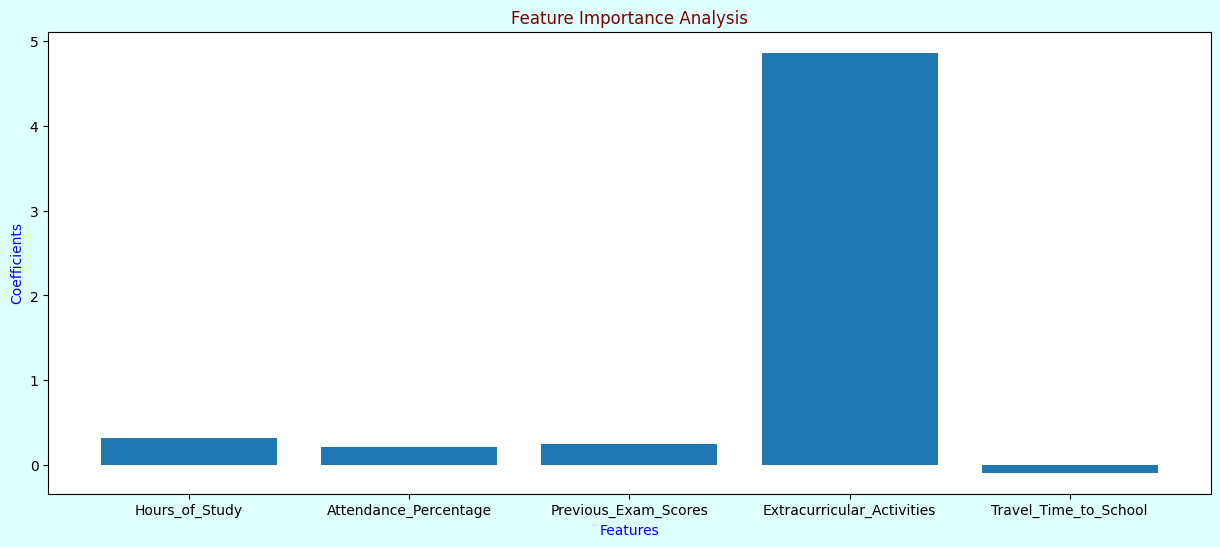

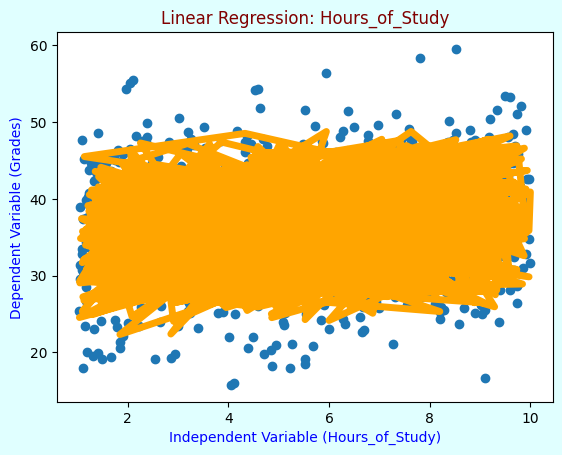

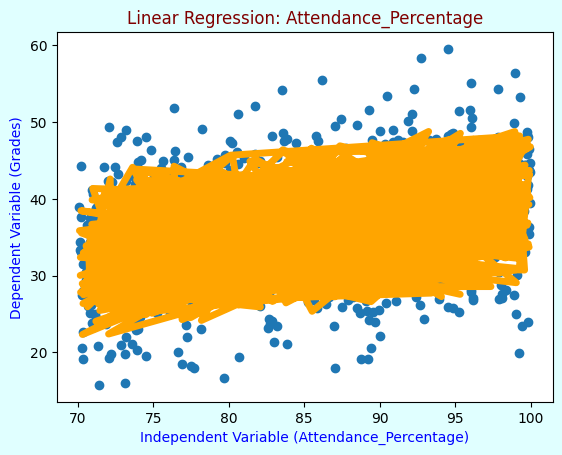

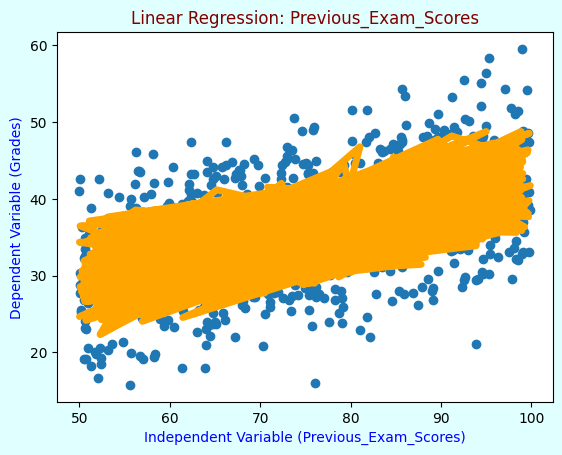

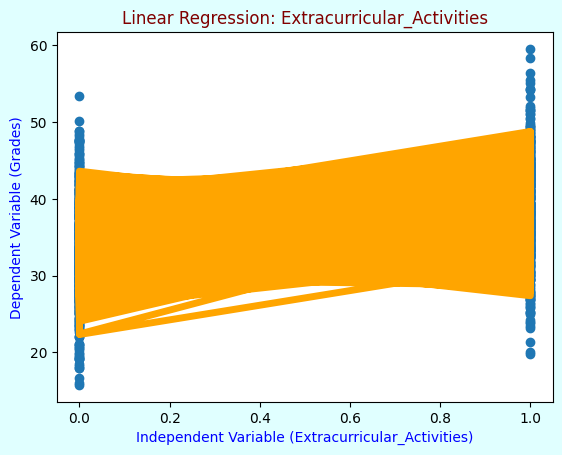

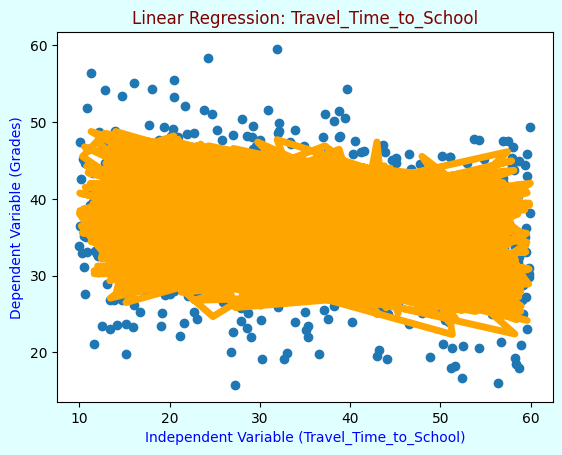

New X: [[ 4.42801771 98.0330808  56.72175647  1.         22.02657926]]
Predicted Y for New X: 37.69658357359279


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#@title 7. Feature Importance Analysis
#@markdown - The importance of each features is crucial for accurate predication and evaluation of the student grades.

# Features and target variable
X = df[['Hours_of_Study', 'Attendance_Percentage', 'Previous_Exam_Scores', 'Extracurricular_Activities', 'Travel_Time_to_School']]
y = df['Grades']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Retrieve coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Visualize coefficients
plt.figure(figsize=(15, 6), facecolor='lightcyan')
plt.bar(X.columns, coefficients)
plt.xlabel("Features", color='blue')
plt.ylabel("Coefficients", color='blue')
plt.title("Feature Importance Analysis", color='maroon')
plt.show()

# Scatter plots and regression lines for each feature
for feature in X.columns:
    plt.figure(facecolor='lightcyan')
    plt.scatter(X[feature], y)
    plt.plot(X[feature], model.predict(X), color='orange', linewidth=5)
    plt.xlabel(f'Independent Variable ({feature})', color='blue')
    plt.ylabel('Dependent Variable (Grades)', color='blue')
    plt.title(f'Linear Regression: {feature}', color='maroon')
    plt.show()

# Predictions for new data
new_data = df.sample(1, random_state=42)  # Sample a random row for demonstration
new_x = new_data[X.columns]  # Use only the features for prediction
predicted_y = model.predict(new_x.values.reshape(1, -1))
print("New X:", new_x.values)
print("Predicted Y for New X:", predicted_y[0])

In [ ]:
#@title 8. Discussion
#@markdown - The feature that seem to have the most influence on the student's grades based on the descriptive statistics is the previous exam scores as it is the most linear among the features. The findings that sticks out the most is the extra curricular activities because of its parallel graph, and the Travel time to school because it has an opposite, declining slope, which is because it doesn't have much importance to the student grades.

In [ ]:
#@title 9. Scenario Extension
#@markdown - It would probably be something like the financial status and individual's bringing, whether one is born with disability or disorder related to mind. First, financial status of a person might affect their overall ability to increase their own grades. Same goes for the mental state of a person, whether they have disability, an inborn, or have an unstable mind can heavily affect how they perform and reflect on their grades.

In [ ]:
#@title 10. Reflection
#@markdown - There are a lot of challenges I faced, including the struggle in progressing throughout the activity. Like when trying to loop each model in #4 Cell, which I gave up midway because I lack the knowledge to make it, but I managed to make an alternative to show it in a clear way.
#@markdown - The Importance and significance of the features are visibly to be used and valid. Each of the features shows connection and the potential impact with how will the student's grade will be, while we can also tell that there are difference and exceptions that makes no to little connection.
#@markdown - I'd say that this kind of model can be used in many industries like job companies for determining the employee's salary, and many more.